#  Clustering
This notebook contains all the steps necessary to cluster the used datasets in a script-wise manner, and plot the results together with an agregatted representative to identify the cluster.

In [1]:
import numpy as np
from tslearn.barycenters import dtw_barycenter_averaging
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans
import pandas as pd
import math
from sklearn.preprocessing import StandardScaler

## Time Series
For TS I will use K-means clustering with Dynamic Time Warping as a distance metric and DWT Barymetric Average clustering for aggregation.

### Weather

Nº of clusters: 5


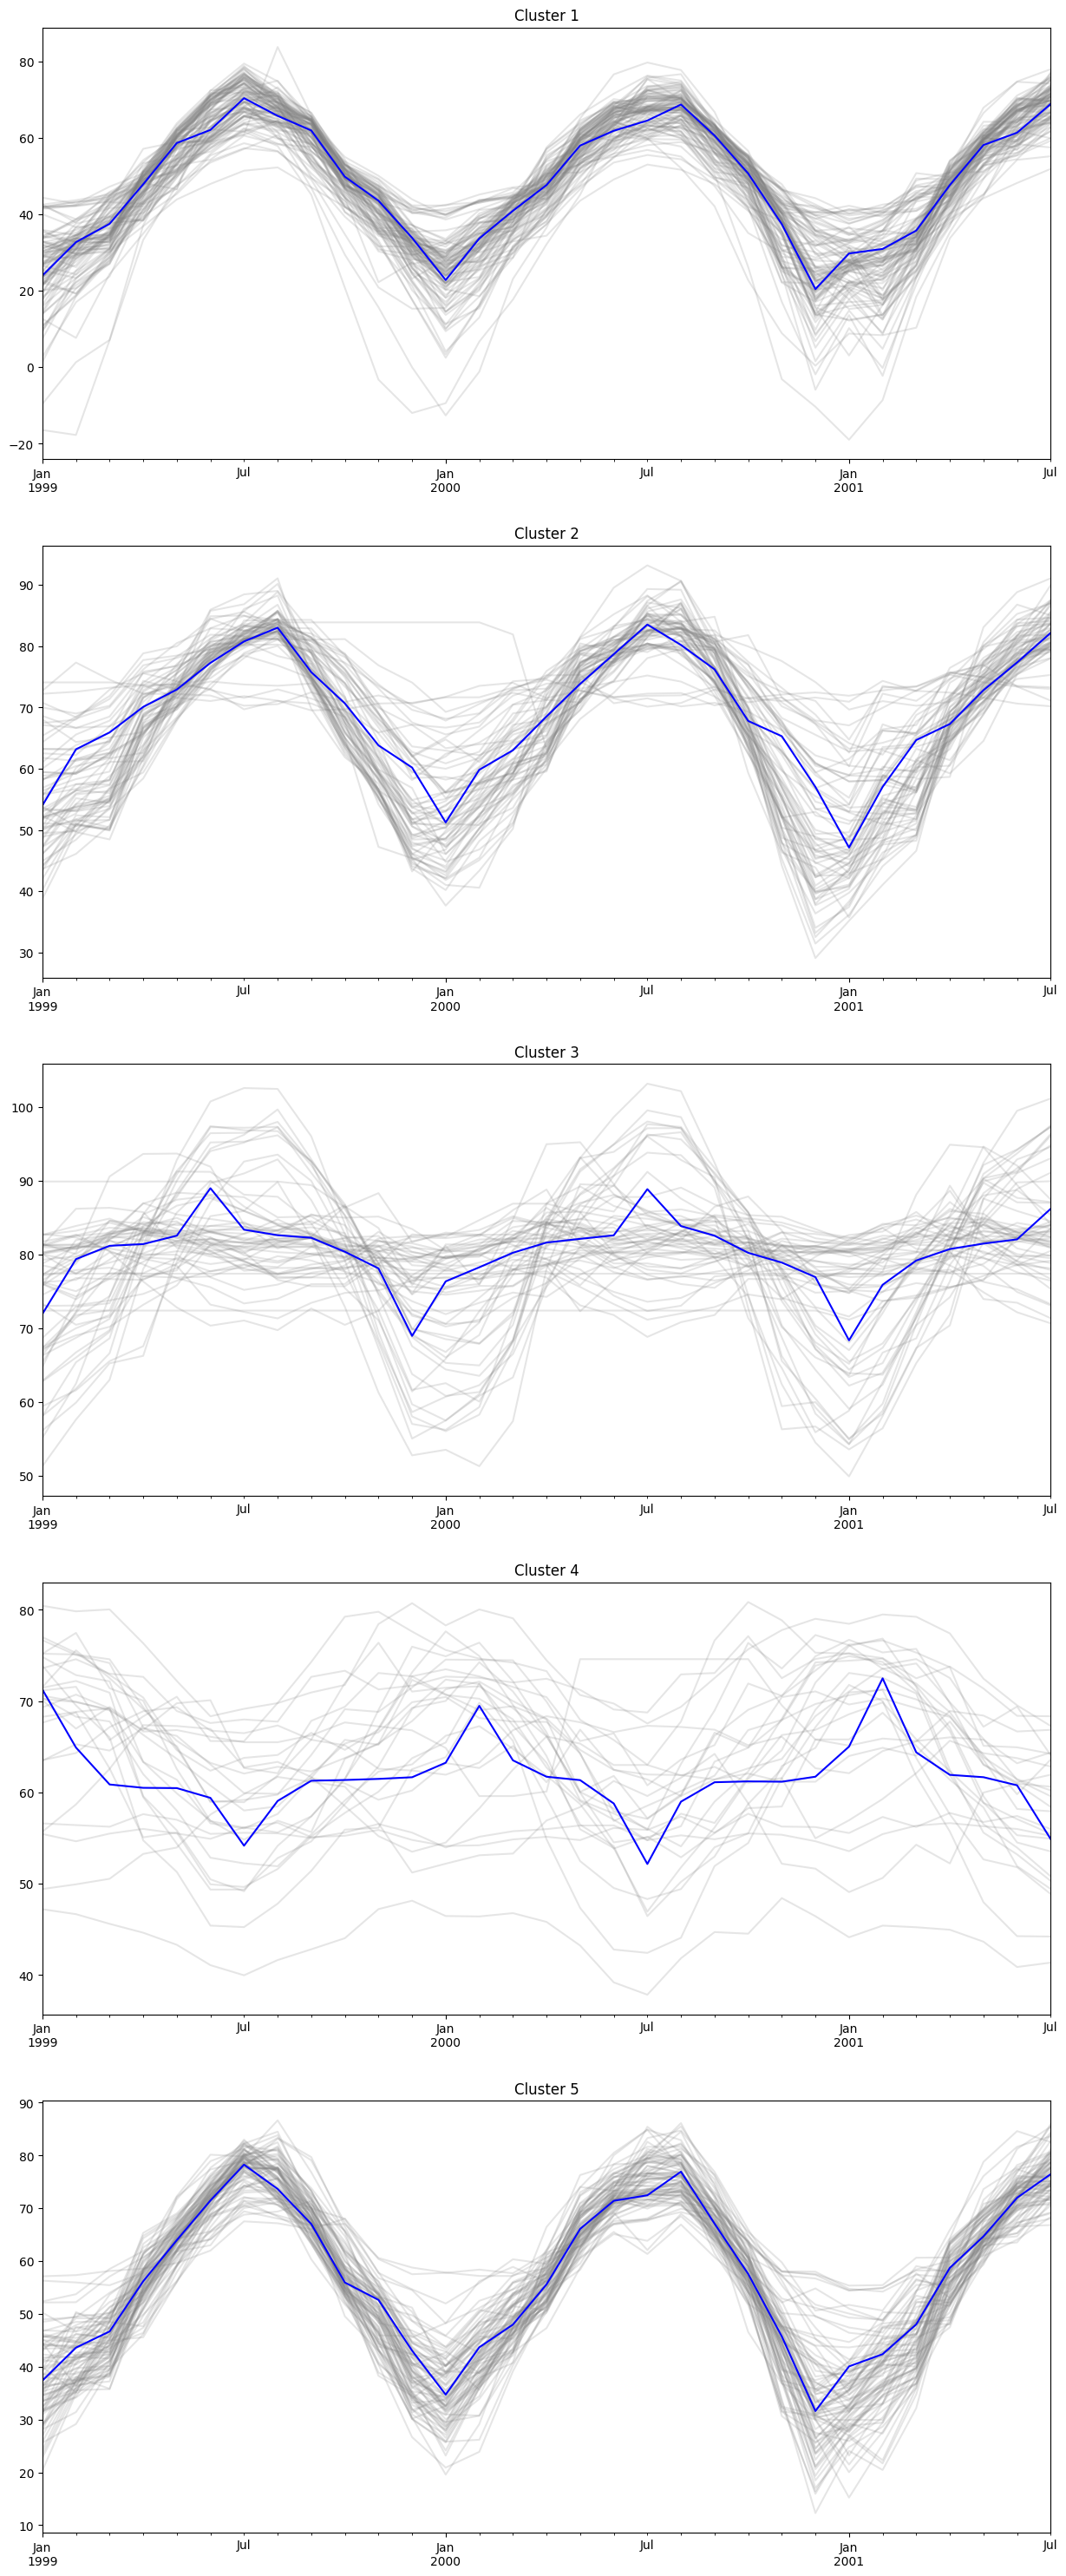

In [19]:
# Weather data
X_weather = pd.read_pickle('../Dataset/preprocessed/weather/X.pkl')

scaler = StandardScaler()
scaled_weather = scaler.fit_transform(X_weather)

# number of clusters k is the square root of the number of points in the training data
cluster_count = math.ceil(math.sqrt(len(X_weather))) 
cluster_count = min(5,cluster_count)
print(f"Nº of clusters: {cluster_count}")
km = TimeSeriesKMeans(n_clusters=cluster_count, metric="dtw")

# cluster_labels_weather = km.fit_predict(X_weather)
cluster_labels_weather = km.fit_predict(scaled_weather)
fig, axs = plt.subplots(cluster_count,1, figsize=(15,cluster_count*7.5))
for cluster in range(cluster_count):
    idxs = np.where(cluster_labels_weather==cluster)[0]
    cluster_data = X_weather.iloc[idxs].T
    cluster_data.plot(ax = axs[cluster], color='grey', legend=False, alpha=0.2)
    barycenter = dtw_barycenter_averaging(cluster_data.T, max_iter=5).flatten()
    pd.DataFrame(barycenter, index = cluster_data.index).plot(ax = axs[cluster], color='blue', legend=False)
    axs[cluster].set_title(f"Cluster {cluster+1}")
plt.show()

In [20]:
km.inertia_

2.496215361193994

### Finance

In [24]:
# finance data
X_finance = pd.read_pickle('../Dataset/preprocessed/finance/X_diff.pkl')

In [27]:
scaler = StandardScaler()
scaled_finance = scaler.fit_transform(X_finance)
# scaled_finance = scaler.fit_transform(X_finance.T).T

Nº of clusters: 5


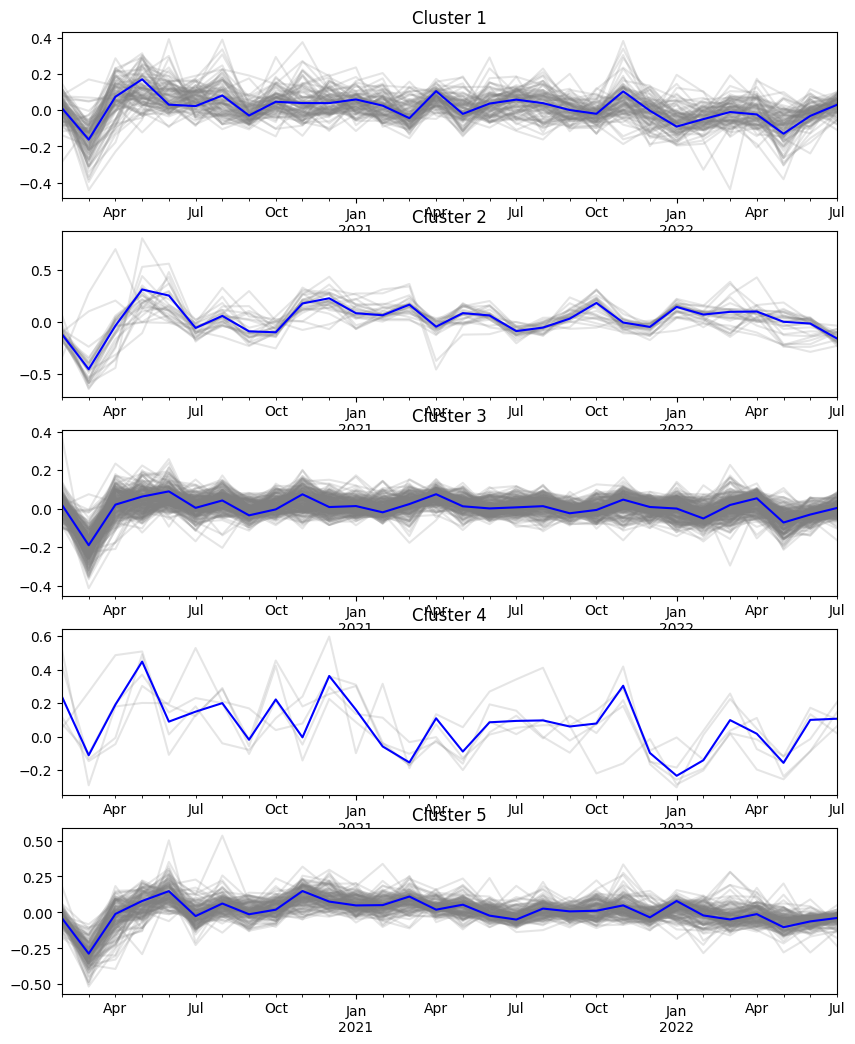

In [28]:
# number of clusters k is the square root of the number of points in the training data
cluster_count = math.ceil(math.sqrt(len(X_finance))) 
cluster_count = min(5,cluster_count)
print(f"Nº of clusters: {cluster_count}")
km = TimeSeriesKMeans(n_clusters=cluster_count, metric="dtw", n_init=10)

cluster_labels_finance = km.fit_predict(scaled_finance)
fig, axs = plt.subplots(cluster_count,1, figsize=(10,cluster_count*2.5))
for cluster in range(cluster_count):
    idxs = np.where(cluster_labels_finance==cluster)[0]
    cluster_data = X_finance.iloc[idxs].T
    cluster_data.plot(ax = axs[cluster], color='grey', legend=False, alpha=0.2)
    barycenter = dtw_barycenter_averaging(cluster_data.T, max_iter=5).flatten()
    pd.DataFrame(barycenter, index = cluster_data.index).plot(ax = axs[cluster], color='blue', legend=False)
    axs[cluster].set_title(f"Cluster {cluster+1}")
plt.show()

In [11]:
km.inertia_

7.574625622244118

### Save TS cluster data

In [7]:
pd.Series(cluster_labels_weather).rename("cluster id").to_pickle("../Dataset/cluster_data/ts_weather_clusters.pkl")
pd.Series(cluster_labels_finance).rename("cluster id").to_pickle("../Dataset/cluster_data/ts_finance_clusters.pkl")